<a href="https://colab.research.google.com/github/gdutr/gdutr.github.io/blob/main/Etude_maladie_renale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Rein

- Taille : 400 lignes, 26 colonnes
-

In [49]:
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_rein = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv", na_values=nan)

In [50]:
df_rein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             385 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             314 non-null    float64
 17  wc              294 non-null    flo

In [51]:
df_rein

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [52]:
for col in df_rein.select_dtypes(object).columns:
  print(df_rein[col].value_counts())
  print('\n')

normal      201
abnormal     47
Name: rbc, dtype: int64


normal      259
abnormal     76
Name: pc, dtype: int64


notpresent    354
present        42
Name: pcc, dtype: int64


notpresent    374
present        22
Name: ba, dtype: int64


no     251
yes    147
Name: htn, dtype: int64


no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64


no      362
yes      34
\tno      2
Name: cad, dtype: int64


good    317
poor     82
Name: appet, dtype: int64


no     323
yes     76
Name: pe, dtype: int64


no     339
yes     60
Name: ane, dtype: int64


ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64




## Info

In [53]:
df_rein.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,399.000000,385.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,314.000000,294.000000,269.000000
mean,199.892231,51.615584,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.687898,8406.122449,4.707435
std,115.492678,17.270301,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.156679,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.500000,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


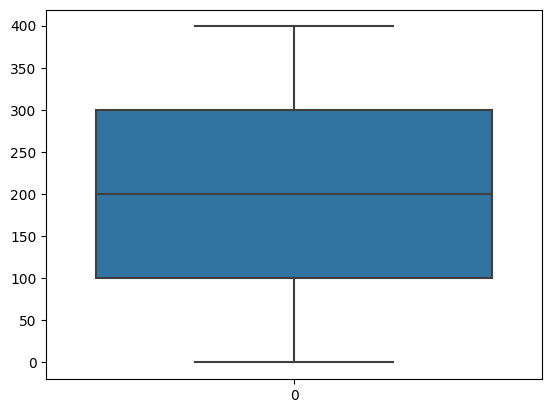

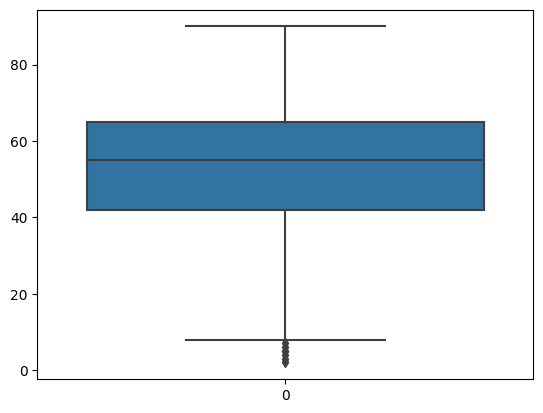

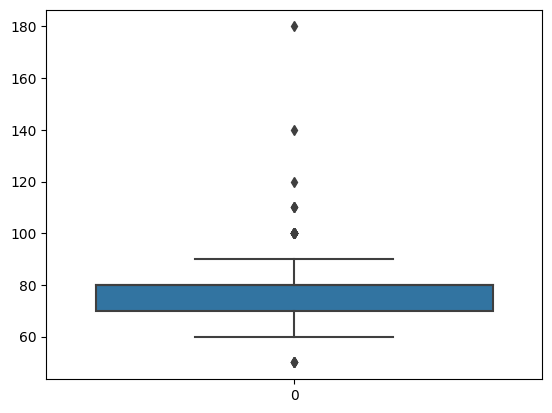

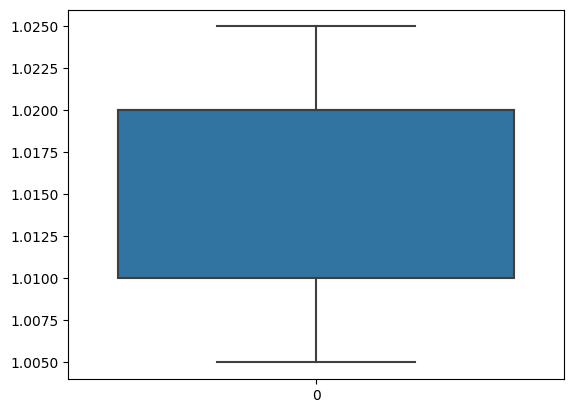

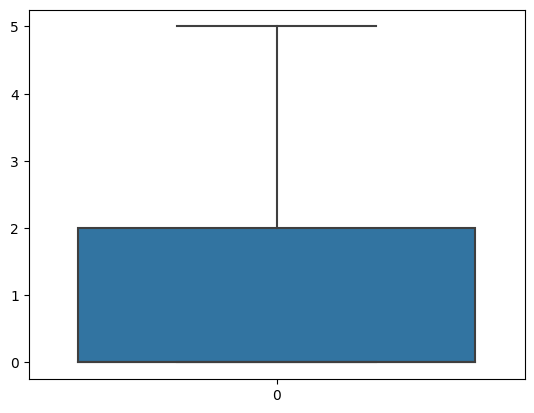

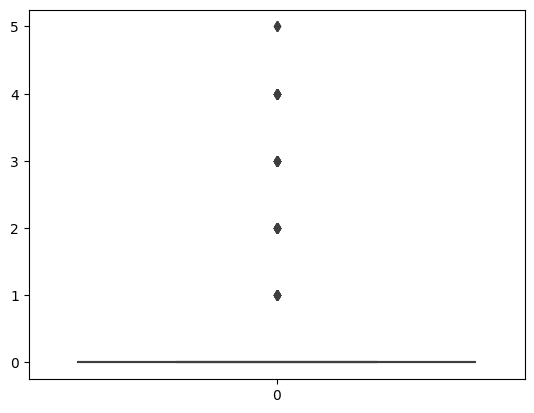

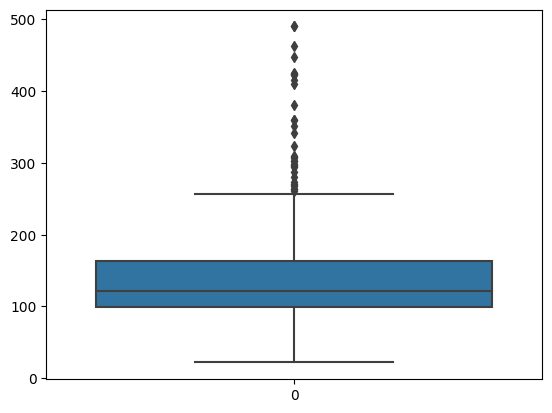

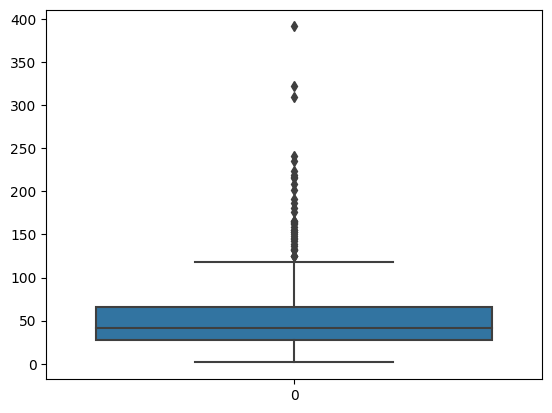

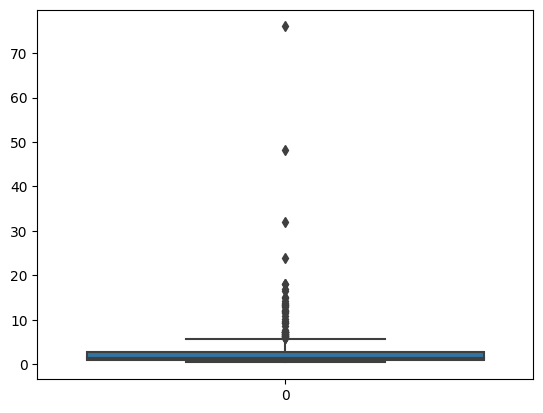

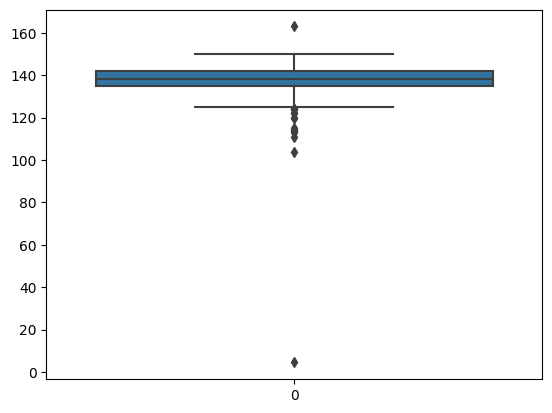

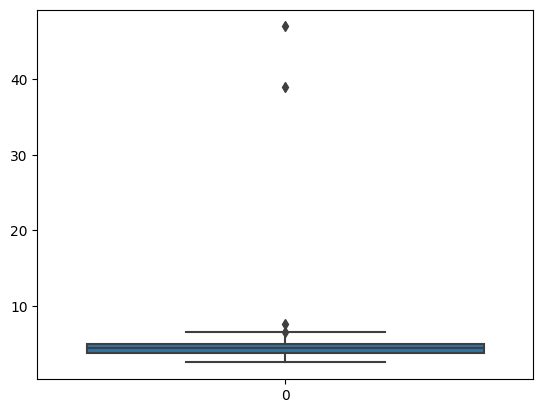

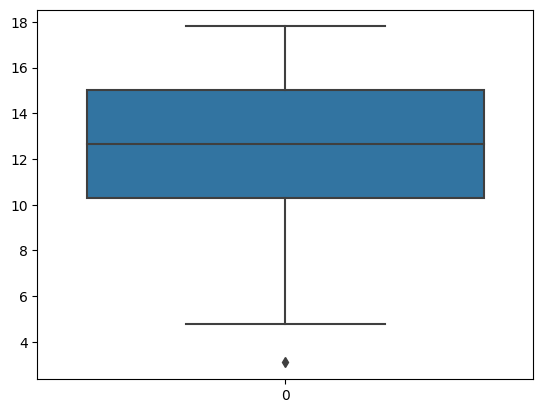

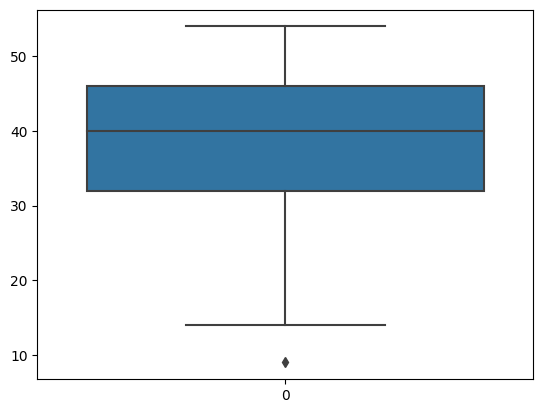

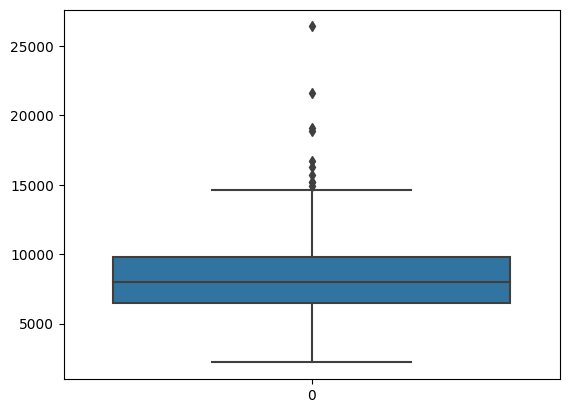

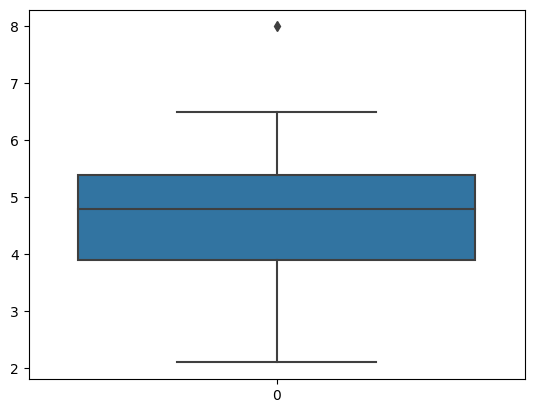

In [86]:
for col in df_rein.select_dtypes([int,float]).columns:
  plt.figure()
  sns.boxplot(df_rein[col])
  plt.show()

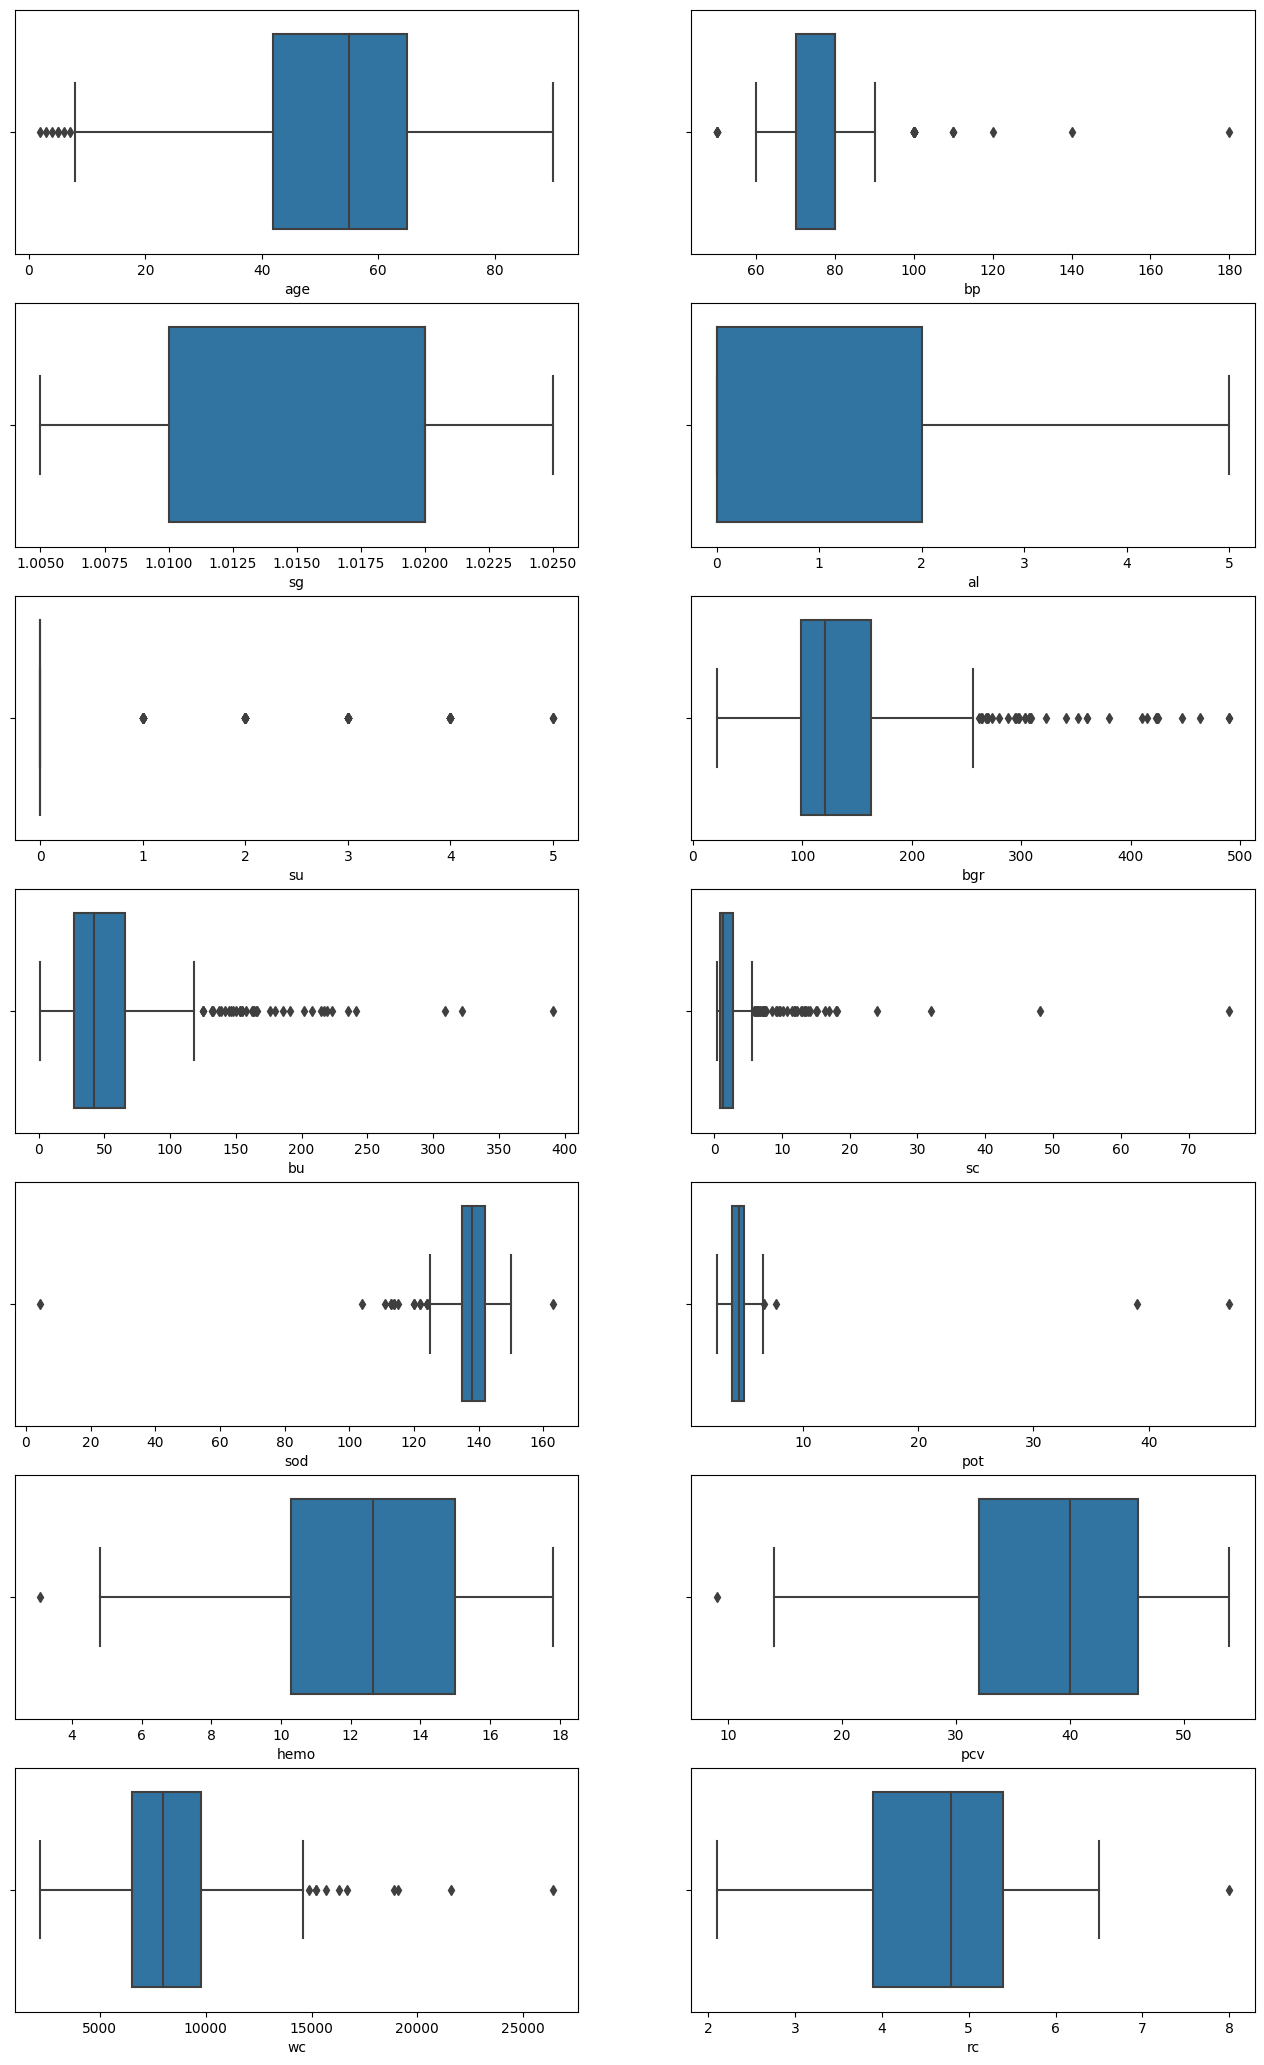

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [91]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(x = df_rein[list_cols[id]], ax=axes[row,col])#.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

In [55]:
df_rein.select_dtypes([int,float])


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [56]:
df_rein.shape

(400, 26)

## Valeurs manquantes

<Axes: title={'center': 'Pourcentage de valeur manquantes'}>

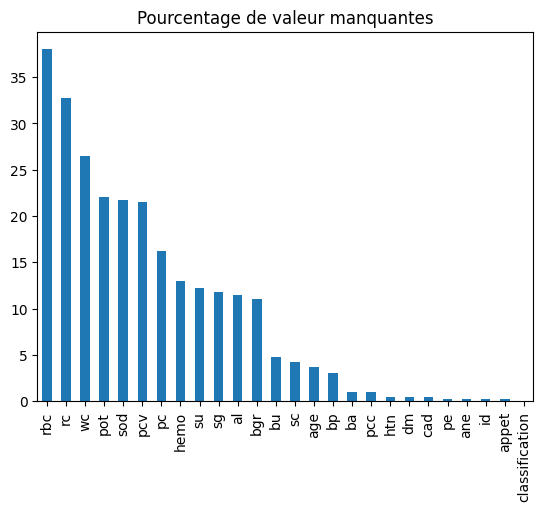

In [57]:
(df_rein.isna().mean().sort_values(ascending=False)*100).plot(kind = "bar", title = "Pourcentage de valeur manquantes")